In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_roc_curve


In [2]:
train = pd.read_csv('data_train.csv')
test = pd.read_csv('data_test.csv')

In [3]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,2,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,12,1,0,0,0,0,40,0,1
3,44,2,160323,5,10,1,9,1,1,0,7688,0,40,0,1
4,18,5,103497,5,10,0,11,3,0,1,0,0,30,0,0


In [4]:
train.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [5]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,32551,32552,32553,32554,32555,32556,32557,32558,32559,32560
age,39,50,38,53,28,37,49,52,31,42,...,32,43,32,53,22,27,40,58,22,52
workclass,0,1,2,2,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,2,6
fnlwgt,77516,83311,215646,234721,338409,284582,160187,209642,45781,159449,...,34066,84661,116138,321865,310152,257302,154374,151910,201490,287927
education,0,0,1,2,0,3,4,1,3,0,...,12,7,3,3,5,6,1,1,1,1
education-num,13,13,9,7,13,14,5,9,14,13,...,6,11,14,14,10,12,9,9,9,9
marital-status,0,1,2,1,1,1,3,1,0,1,...,1,1,0,1,0,1,1,6,0,1
occupation,0,1,2,2,3,1,4,1,3,1,...,2,5,10,1,12,10,9,0,0,1
relationship,0,1,0,1,2,2,0,1,0,1,...,1,1,0,1,0,2,1,4,3,2
race,0,0,0,1,1,0,1,0,0,0,...,3,0,2,0,0,0,0,0,0,0
sex,0,0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [14]:
y = train['income']
X = train.drop(columns='income', axis =1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [18]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
rfc.score

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [22]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.75      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [23]:
print(confusion_matrix(y_test, pred_rfc))

[[4607  335]
 [ 569 1002]]


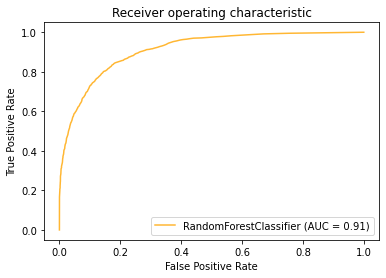

In [29]:
ax = plt.gca()

rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, color='orange',alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.show()


In [ ]:
def x ():
    """
    
    """